##### step1: import the model

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn

##### step2: Load the file (csv, excel)

In [3]:
file=pd.read_csv('Boston_housing.data',delim_whitespace=True,header=None)
file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
col_name=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
file.columns=col_name

In [5]:
file.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### 3.describe: skewed or not

In [6]:
file.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###### 4.data exploration

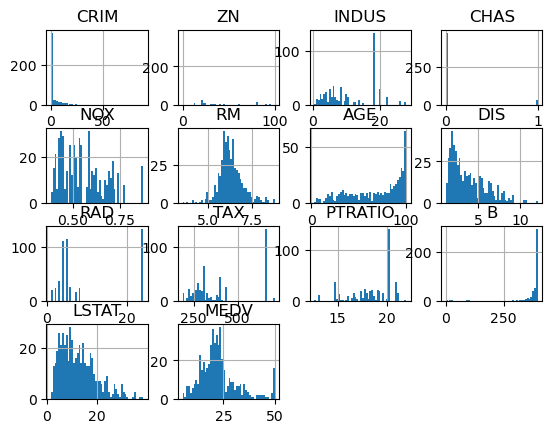

In [7]:
import matplotlib.pyplot as plt
file.hist(bins=50)
plt.show()

#### RM VS MEDV

In [47]:
x=file['RM'].values.reshape(-1,1)
y=file['MEDV'].values

#### import model and instantiate model

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [52]:
model.coef_ #slope of the line

array([9.22505308])

In [53]:
model.intercept_ #c value

-35.27560209483997

In [54]:
#Y prediction
Y_test_p=model.predict(xtest)
y_train_pre=model.predict(xtrain)

In [55]:
from sklearn.metrics import r2_score
r2_score(ytest,Y_test_p)

0.4569047606085108

In [56]:
r2_score(ytrain,y_train_pre)

0.48634853301963044

### LSTAT vs MEDV

In [57]:
x=file['LSTAT'].values.reshape(-1,1)
y=file['MEDV'].values

In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [63]:
model2=LinearRegression()
model2.fit(xtrain,ytrain)

LinearRegression()

In [64]:
#Y prediction
Y_test_p2=model2.predict(xtest)
y_train_pre2=model2.predict(xtrain)

In [65]:
from sklearn.metrics import r2_score
r2_score(ytest,Y_test_p2)

0.4441854305880162

In [66]:
r2_score(ytrain,y_train_pre2)

0.5604253110466472

### STAT & RM vs MEDV

In [67]:
x=file[['LSTAT','RM']].values
y=file['MEDV'].values

In [68]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [69]:
model3=LinearRegression()
model3.fit(xtrain,ytrain)

LinearRegression()

In [70]:
#Y prediction
Y_test_p3=model3.predict(xtest)
y_train_pre3=model3.predict(xtrain)

In [71]:
from sklearn.metrics import r2_score
r2_score(ytest,Y_test_p3)

0.5841519194311255

In [72]:
r2_score(ytrain,y_train_pre3)

0.6468915821243122

### all column vs MEDV

In [79]:
x=file.drop(columns='MEDV')
y=file['MEDV']

In [80]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [83]:
model4=LinearRegression()
model4.fit(xtrain,ytrain)

LinearRegression()

In [84]:
#Y prediction
Y_test_p4=model4.predict(xtest)
y_train_pre4=model4.predict(xtrain)

In [85]:
from sklearn.metrics import r2_score
r2_score(ytest,Y_test_p4)

0.7438826183113547

In [86]:
r2_score(ytrain,y_train_pre4)

0.7360198858245186

### VIF

In [91]:
X=file[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
#VIF dataframe
vif_data=pd.DataFrame()
vif_data['features']=X.columns

#calculating VIF for each features
vif_data['VIF']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

   features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025
